In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer, CRS
import cv2
import sys
import math
import matplotlib.pyplot as plt
from pyproj import Transformer, CRS
import cv2
import os
import numpy as np
import cv2
import sys
sys.setrecursionlimit(25000)
plt.rcParams['figure.figsize'] = [10, 10]

In [49]:
def get_8bits(img_source, show=False):    
    img_8bits = cv2.convertScaleAbs(img_source, alpha=0.03)
    if show:
        plt.imshow(img_8bits,cmap = 'gray')
        plt.show()
    return img_8bits

def get_edges(img_source, show=False):
    img_edges = cv2.Canny(img_source,10,50, None)
    if show:
        plt.imshow(img_edges,cmap = 'gray')
        plt.show()        
    return img_edges

def get_NDVI(img_b04_path, img_b08_path):
    img_b04 = cv2.imread(img_b04_path, -1)
    img_b08 = cv2.imread(img_b08_path, -1)
    
    NDVI = np.uint8(((img_b08 - img_b04)/(img_b08 + img_b04))*256)
    return NDVI

def view_kmeans(img_src_path):    
#     img_1 = cv2.imread(img_src_path, -1)
#     img_1 = get_NDVI("./data/machine_learning/interest_b04.tif", 
#                      "./data/machine_learning/interest_b08.tif")


#     img_1 = get_NDVI("./data/machine_learning/interest_b0420201015.tif", 
#                      "./data/machine_learning/interest_b0820201015.tif")
    
    img_1 = get_NDVI("./data/machine_learning/interest_b04_pivot.tif", 
                     "./data/machine_learning/interest_b08_pivot.tif")


    print("img_1.shape", img_1.shape)

    img_k = img_1.reshape((-1,2))

    print("img_k.shape",img_k.shape)

    img_k = np.float32(img_k)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 1.0)
    attempts = 30
    k = 5

    ret, label, center = cv2.kmeans(img_k, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    result = res.reshape((img_1.shape))
    plt.imshow(result, cmap = 'gray')
    plt.show()
    print("center", center)
    print("result", result)
    pass

img_1.shape (500, 500)
img_k.shape (125000, 2)


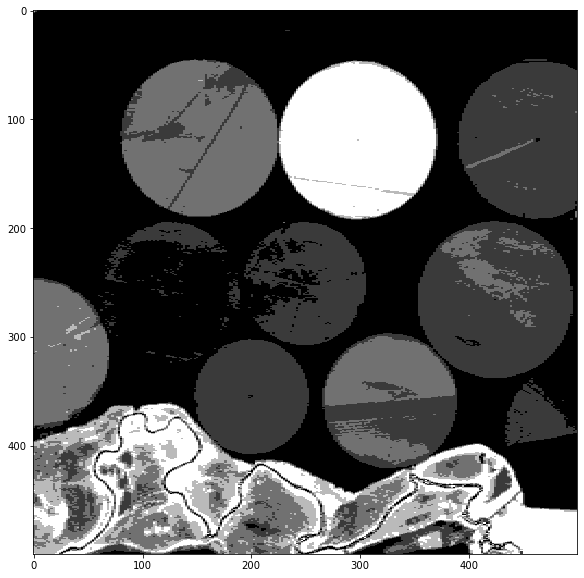

center [[112 112]
 [158 158]
 [ 39  39]
 [ 76  76]
 [202 202]]
result [[202 202 158 ...  39  39  39]
 [158 158  76 ...  39  39  39]
 [ 76  76  39 ...  39  39  39]
 ...
 [158 158 158 ... 202 202 202]
 [158 158 158 ... 202 202 202]
 [202 202 158 ... 202 202 202]]


In [50]:
view_kmeans("./data/machine_learning/interest_b08.tif")

In [23]:
get_NDVI("./data/machine_learning/interest_b04.tif", "./data/machine_learning/interest_b08.tif")

[[ 896  869  912 ... 1758 1766 1728]
 [ 906  912  893 ... 1776 1726 1752]
 [ 850  897  893 ... 1760 1732 1758]
 ...
 [1106 1092 1078 ... 1005 1086 1098]
 [1052 1106 1048 ... 1004 1042 1110]
 [1032 1082 1060 ... 1100 1100 1038]]
[[2578 2476 2504 ... 2830 2784 2822]
 [2488 2438 2510 ... 2812 2792 2832]
 [2546 2558 2546 ... 2790 2778 2796]
 ...
 [2468 2468 2482 ... 2692 2662 2548]
 [2592 2554 2552 ... 2654 2636 2600]
 [2622 2596 2552 ... 2588 2558 2684]]
[[1682 1607 1592 ... 1072 1018 1094]
 [1582 1526 1617 ... 1036 1066 1080]
 [1696 1661 1653 ... 1030 1046 1038]
 ...
 [1362 1376 1404 ... 1687 1576 1450]
 [1540 1448 1504 ... 1650 1594 1490]
 [1590 1514 1492 ... 1488 1458 1646]]
